### AG News Classification

***

ORIGIN

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity. For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

DESCRIPTION

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.

The file classes.txt contains a list of classes corresponding to each label.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 3 columns in them, corresponding to class index (1 to 4), title and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

You can download the dataset from <a href = "https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset">Here</a>

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Read the dataset

In [3]:
df = pd.read_csv('agnews.csv')

### Save only a portion of the dataset

In [4]:
df = df[0:20000]

In [5]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


### Shuffle the dataset

In [6]:
df = df.sample(frac = 1)

In [7]:
df.reset_index(drop = True, inplace = True)

In [8]:
for i in range(10):
    print(df['Description'][i],'-', df['Class Index'][i])
    print()

CAMARILLO, Calif. - Gas prices have dropped nearly 5 cents in the past three weeks with an increase in supply, but soaring crude oil prices could cause rates to rise again soon, an industry analyst said Sunday... - 1

Oil supply concerns and broker downgrades of blue-chip companies left stocks mixed yesterday, raising doubts Wall Street #39;s year- end rally would continue. - 3

Reuters - If U.S. and Iraqi troops launch a\major assault on radical cleric Moqtada al-Sadr's militants,\they will have to pass through sniper-infested streets to root\them out of a mosque they can't afford to harm. - 1

Russian investigators found residue of an explosive substance on the wreckage of the second of two airliners that crashed minutes apart Tuesday night, a security spokesman said yesterday  - 1

Microsoft plas to release Windows Media Player 10 on Thursday alongside the highly anticipated MSN Music Store. WMP10 will be included in Windows XP Media Center Edition 2005 which finalized some time aft

### Check Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  20000 non-null  int64 
 1   Title        20000 non-null  object
 2   Description  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


### View basic statistical information about the dataset

In [10]:
df.describe(include = 'all')

,Class Index,Title,Description
count,20000.000000,20000,20000
unique,NaN,19020,19781
top,NaN,SI.com,"ATHENS, Greece - Michael Phelps doesn't mind m..."
freq,NaN,13,4
mean,2.484500,NaN,NaN
std,1.133633,NaN,NaN
min,1.000000,NaN,NaN
25%,1.000000,NaN,NaN
50%,2.000000,NaN,NaN
75%,4.000000,NaN,NaN


### Check for missing values

In [11]:
df.isna().sum()

Class Index    0
Title          0
Description    0
dtype: int64

### Check for duplicates

In [33]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

C:\Users\mnkv1\AppData\Local\Temp\ipykernel_22900\3427876340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Class Index'], palette='muted')


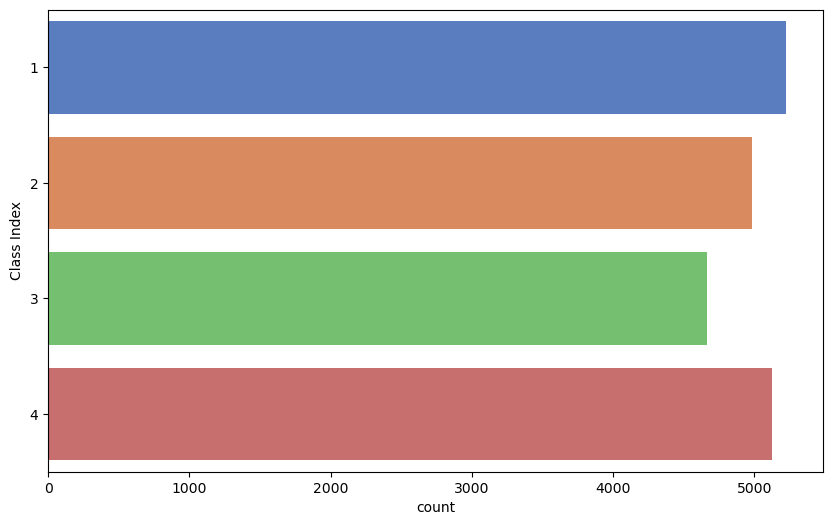

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(y = df['Class Index'], palette='muted')
plt.show()

### Create a funciton to preprocess the text

In [16]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Apply the preprocess function to the description

In [17]:
df['Description'] = df['Description'].apply(preprocess)

In [18]:
for i in range(10):
    print(df['Description'][i],'-', df['Class Index'][i])
    print()

camarillo calif gas price drop nearly 5 cents past three weeks increase supply soar crude oil price could cause rat rise soon industry analyst say sunday - 1

oil supply concern broker downgrade blue chip company leave stock mix yesterday raise doubt wall street 39 year end rally would continue - 3

reuters if u s iraqi troop launch major assault radical cleric moqtada al sadr militants pass sniper infest streets root mosque afford harm - 1

russian investigators find residue explosive substance wreckage second two airliners crash minutes apart tuesday night security spokesman say yesterday - 1

microsoft plas release windows media player 10 thursday alongside highly anticipate msn music store wmp10 include windows xp media center edition 2005 finalize time sp2 - 4

while microsoft amd suggest well next year final version winxp 64 release yesterday start offer fresh preview edition come software support intel amd 64 bite - 4

carlos pena hellos handshakes hug face red sox last night fe

### Split Input & Target Variables

In [19]:
X = df['Description']
y = df['Class Index']

### One Hot encode our Target Variable

In [20]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [21]:
labels = encoder.classes_
labels

array([1, 2, 3, 4], dtype=int64)

### Split the dataset into Training & Testing Set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [23]:
tokenizer = Tokenizer(num_words=5000)

### fit on text for our X

In [24]:
tokenizer.fit_on_texts(X)

In [25]:
vocab_size = len(tokenizer.word_index) + 1

### Create a function to convert text to numerical representation and add padding

In [26]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

### Apply the function to our X_train & X_test

In [27]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

### Create keras Sequential model with GRU Layers

In [28]:
model = Sequential()
### Embedding layer
model.add(layers.Embedding(vocab_size, 128))

### GRU layer
### return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.add(layers.GRU(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train the model with our Training Set

In [31]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 96s 215ms/step - accuracy: 0.6290 - loss: 0.8667 - val_accuracy: 0.8700 - val_loss: 0.3997
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 207ms/step - accuracy: 0.9154 - loss: 0.2726 - val_accuracy: 0.8756 - val_loss: 0.3777
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 207ms/step - accuracy: 0.9407 - loss: 0.1971 - val_accuracy: 0.8675 - val_loss: 0.4095
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 208ms/step - accuracy: 0.9570 - loss: 0.1336 - val_accuracy: 0.8662 - val_loss: 0.4592
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 208ms/step - accuracy: 0.9682 - loss: 0.1047 - val_accuracy: 0.8481 - val_loss: 0.5996
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 84s 209ms/step - accuracy: 0.9743 - loss: 0.0791 - val_accuracy: 0.8562 - val_loss: 0.5622
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 84s 210ms/step - accuracy: 0.9784 - loss: 0.0697 - val_accuracy: 0.8544 - val_loss: 0.6603
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 84s 210ms/step - accuracy: 0.9852 - loss: 0

### Make predictions with Test set

In [32]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step


In [33]:
y_pred = [np.argmax(i) for i in y_pred]

In [34]:
y_test = [np.argmax(i) for i in y_test]

### Check accuracy score

In [35]:
accuracy_score(y_test, y_pred)

0.84175

### Confusion matrix

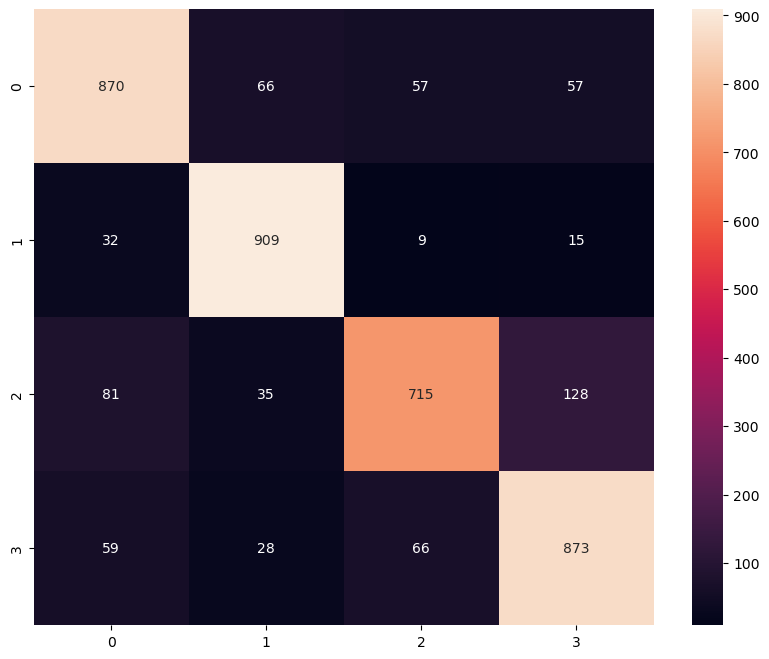

In [36]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

### Classification Report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1050
           1       0.88      0.94      0.91       965
           2       0.84      0.75      0.79       959
           3       0.81      0.85      0.83      1026

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



***